**Library Decalaration:**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importing the Keras libraries and packages
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras
import glob

**Unzipping and Loading Dataset to the Console:**

In [8]:
!unzip "/content/drive/MyDrive/Gender_And_Age_Images.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_1_20170116203506659.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_1_20170116233345047.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_2_20170104212726717.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_2_20170109134248584.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_3_20170109134346011.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/59_1_3_20170109142030313.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/60_0_0_20170103182716210.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/Age_group/validation/45above/60_0_0_20170103182814970.jpg.chip.jpg  
  inflating: /content/Gender_And_Age_Images/A

**Data Loading:**

In [9]:
base_dir = os.path.join(os.getcwd(), 'Gender_And_Age_Images/Male_and_female')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [10]:
train_Male_dir = os.path.join(train_dir, 'Male')  # directory with our training male pictures
train_Female_dir = os.path.join(train_dir, 'Female')  # directory with our training female pictures
validation_Male_dir = os.path.join(validation_dir, 'Male')  # directory with our validation male pictures
validation_Female_dir = os.path.join(validation_dir, 'Female')  # directory with our validation female pictures

In [11]:
num_Male_tr = len(os.listdir(train_Male_dir))
num_Female_tr = len(os.listdir(train_Female_dir))

num_Male_val = len(os.listdir(validation_Male_dir))
num_Female_val = len(os.listdir(validation_Female_dir))

total_train = num_Male_tr + num_Female_tr
total_val = num_Male_val + num_Female_val

In [12]:
base_dir1 = os.path.join(os.getcwd(), 'Gender_And_Age_Images/Age_group')
train_dir1 = os.path.join(base_dir1, 'train')
validation_dir1 = os.path.join(base_dir1, 'validation')

In [13]:
train_1to10_dir = os.path.join(train_dir1, '1-10')  # directory with our training 1to10 pictures
train_11to25_dir = os.path.join(train_dir1, '11-25')  # directory with our training 11to25 pictures
train_26to45_dir = os.path.join(train_dir1, '26-45')  # directory with our training 26to45 pictures
train_45above_dir = os.path.join(train_dir1, '45above')  # directory with our training 45above pictures

validation_1to10_dir = os.path.join(validation_dir1, '1-10')  # directory with our validation 1to10 pictures
validation_11to25_dir = os.path.join(validation_dir1, '11-25')  # directory with our validation 11to25 pictures
validation_26to45_dir = os.path.join(validation_dir1, '26-45')  # directory with our validation 26to45 pictures
validation_45above_dir = os.path.join(validation_dir1, '45above')  # directory with our validation 45above pictures

In [14]:
num_1to10_tr = len(os.listdir(train_1to10_dir))
num_11to25_tr = len(os.listdir(train_11to25_dir))
num_26to45_tr = len(os.listdir(train_26to45_dir))
num_45above_tr = len(os.listdir(train_45above_dir))

num_1to10_val = len(os.listdir(validation_1to10_dir))
num_11to25_val = len(os.listdir(validation_11to25_dir))
num_26to40_val = len(os.listdir(validation_26to45_dir))
num_45above_val = len(os.listdir(validation_45above_dir))

total_train1 = num_1to10_tr + num_11to25_tr + num_26to45_tr + num_45above_tr
total_val1 = num_1to10_val + num_11to25_val + num_26to40_val + num_45above_val

**Setting Model Parameters:**

In [27]:
BATCH_SIZE = 125  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [59]:
BATCH_SIZE1 = 250  # Number of training examples to process before updating our models variables
IMG_SHAPE1  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

**Model Creation for Gender:**

In [39]:
# Initialising the CNN
gendermodel = Sequential()

# 1st Convolutional layer
# step-1 (convolution)
gendermodel.add(Conv2D(32, kernel_size=(3, 3),input_shape=(150,150,3),activation='relu',padding="same"))
# step-2 (pooling)
gendermodel.add(MaxPooling2D(pool_size=(2, 2)))

# With more hidden layers

gendermodel.add(Conv2D(64, (3, 3), activation = 'relu'))
gendermodel.add(MaxPooling2D(2,2))

gendermodel.add(Conv2D(128, (3,3), activation='relu'))
gendermodel.add(MaxPooling2D(2,2))

#gendermodel.add(Conv2D(128, (3,3), activation='relu'))
#gendermodel.add(MaxPooling2D(2,2))

# Step-3 (Dropout)
gendermodel.add(Dropout(0.7))

# Step-4 (Flattening)
gendermodel.add(Flatten())

# Step 5 - Fully connected neural network
gendermodel.add(Dense(512, activation='relu'))
#gendermodel.add(Dense(, activation='relu'))
#gendermodel.add(Dense(16, activation='relu'))
gendermodel.add(Dense(2, activation='softmax'))

gendermodel.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])
gendermodel.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 17, 17, 128)      

**Model Creation for Age:**

In [75]:
import tensorflow as tf
import tensorflow.keras.layers as L

agemodel = tf.keras.Sequential([
    L.InputLayer(input_shape=(150,150,3)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Dropout(rate=0.5),
    L.Flatten(),
    L.Dense(1024, activation='relu'),
    L.Dense(256, activation='relu'),
    L.Dense(4, activation='softmax')
])

agemodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


agemodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)      

**Data Augmentation and Preparation:**

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

**For Gender:**

In [41]:
training_set_g = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 2339 images belonging to 2 classes.


In [33]:
training_set_g.class_indices

{'Female': 0, 'Male': 1}

In [34]:
training_set_g.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [35]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
validation_set_g = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 1693 images belonging to 2 classes.


In [37]:
validation_set_g.class_indices

{'Female': 0, 'Male': 1}

In [38]:
validation_set_g.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**For Age:**

In [76]:
training_set_a = train_datagen.flow_from_directory(batch_size=BATCH_SIZE1,
                                                 directory=train_dir1,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE1,IMG_SHAPE1),
                                                 class_mode='categorical')

Found 4238 images belonging to 4 classes.


In [69]:
training_set_a.class_indices

{'1-10': 0, '11-25': 1, '26-45': 2, '45above': 3}

In [70]:
training_set_a.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [71]:
validation_set_a = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE1,
                                                        directory=validation_dir1,
                                                        target_size=(IMG_SHAPE1, IMG_SHAPE1),
                                                        class_mode='categorical')

Found 3568 images belonging to 4 classes.


In [72]:
validation_set_a.class_indices

{'1-10': 0, '11-25': 1, '26-45': 2, '45above': 3}

In [73]:
validation_set_a.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

**Train the Model:**

**For Gender:**

In [44]:
epochs=50
history = gendermodel.fit_generator(
    training_set_g,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set_g,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 15s 790ms/step - loss: 0.6902 - accuracy: 0.5481 - val_loss: 0.6987 - val_accuracy: 0.4914
Epoch 2/50
19/19 [==============================] - 13s 701ms/step - loss: 0.6792 - accuracy: 0.5737 - val_loss: 0.6741 - val_accuracy: 0.5286
Epoch 3/50
19/19 [==============================] - 13s 696ms/step - loss: 0.6536 - accuracy: 0.6204 - val_loss: 0.6878 - val_accuracy: 0.5428
Epoch 4/50
19/19 [==============================] - 13s 711ms/step - loss: 0.6197 - accuracy: 0.6554 - val_loss: 0.6205 - val_accuracy: 0.6686
Epoch 5/50
19/19 [==============================] - 13s 700ms/step - loss: 0.6000 - accuracy: 0.6691 - val_loss: 0.6879 - val_accuracy: 0.6161
Epoch 6/50
19/19 [==============================] - 13s 701ms/step - loss: 0.5955 - accuracy: 0.6657 - val_loss: 0.6190 - val_accuracy: 0.6675
Epoch 7/50
19/19 [==============================] - 13s 700ms/step - loss: 0.6052 - accuracy: 0.6588 - val_loss: 0.6572 - val_accuracy: 0.6037

**For Age:**

In [77]:
epochs=50
history1 = agemodel.fit_generator(
    training_set_a,
    steps_per_epoch=int(np.ceil(total_train1 / float(BATCH_SIZE1))),
    epochs=epochs,
    validation_data=validation_set_a,
    validation_steps=int(np.ceil(total_val1 / float(BATCH_SIZE1)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
17/17 [==============================] - 28s 1s/step - loss: 3.6818 - accuracy: 0.2567 - val_loss: 1.3863 - val_accuracy: 0.2382
Epoch 2/50
17/17 [==============================] - 25s 2s/step - loss: 1.3860 - accuracy: 0.2690 - val_loss: 1.3866 - val_accuracy: 0.2382
Epoch 3/50
17/17 [==============================] - 25s 1s/step - loss: 1.3857 - accuracy: 0.2690 - val_loss: 1.3869 - val_accuracy: 0.2382
Epoch 4/50
17/17 [==============================] - 25s 2s/step - loss: 1.3856 - accuracy: 0.2690 - val_loss: 1.3874 - val_accuracy: 0.2382
Epoch 5/50
17/17 [==============================] - 25s 1s/step - loss: 1.3854 - accuracy: 0.2690 - val_loss: 1.3876 - val_accuracy: 0.2382
Epoch 6/50
17/17 [==============================] - 25s 1s/step - loss: 1.3854 - accuracy: 0.2690 - val_loss: 1.3879 - val_accuracy: 0.2382
Epoch 7/50
17/17 [==============================] - 25s 1s/step - loss: 1.3854 - accuracy: 0.2690 - val_loss: 1.3881 - val_accuracy: 0.2382
Epoch 8/50
17/17 [==

**Training Result Visualization:**

**For Gender:**

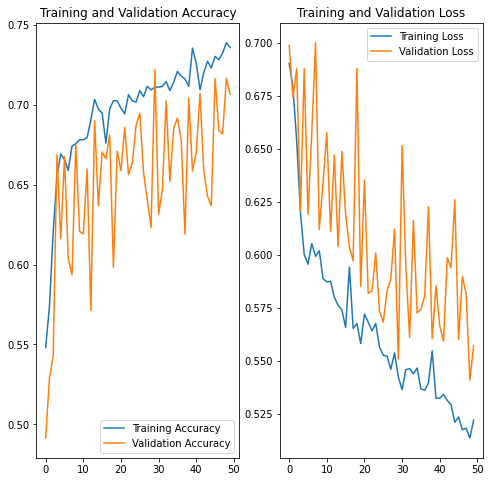

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**For Age:**

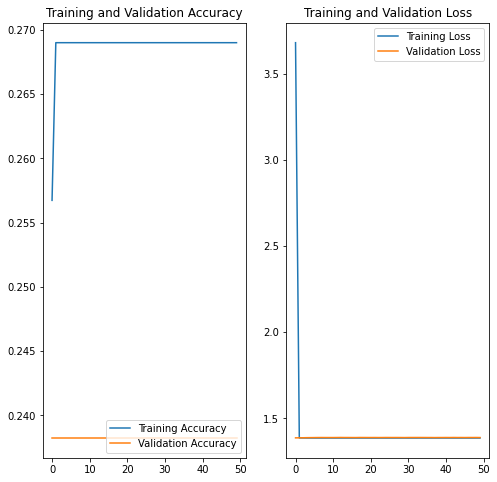

In [78]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs_range1 = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, acc1, label='Training Accuracy')
plt.plot(epochs_range1, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range1, loss1, label='Training Loss')
plt.plot(epochs_range1, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Prediction:**

In [79]:
from tensorflow.keras.preprocessing import image

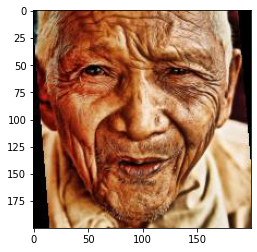

In [80]:
img = image.load_img("/content/Gender_And_Age_Images/Male_and_female/validation/Male/90_0_2_20170111210301275.jpg.chip.jpg")
plt.imshow(img)

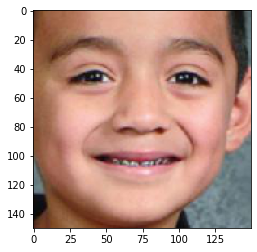

Predicted Age:11-25
Predicted Gender:Male


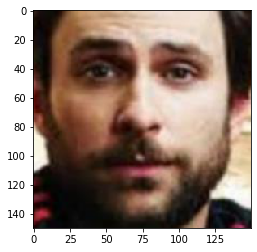

Predicted Age:11-25
Predicted Gender:Female


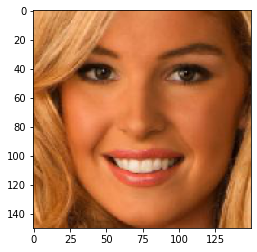

Predicted Age:11-25
Predicted Gender:Female


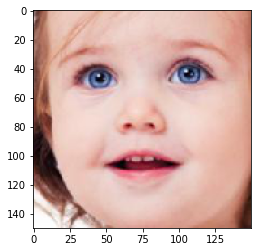

Predicted Age:11-25
Predicted Gender:Female


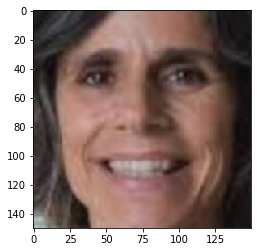

Predicted Age:11-25
Predicted Gender:Female


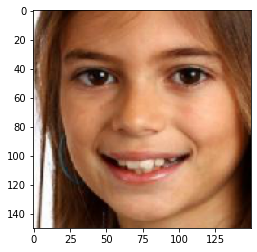

Predicted Age:11-25
Predicted Gender:Male


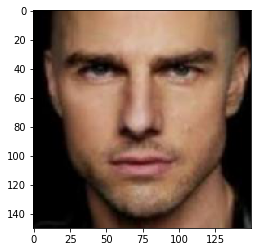

Predicted Age:11-25
Predicted Gender:Female


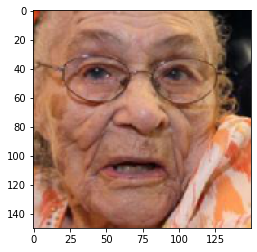

Predicted Age:11-25
Predicted Gender:Male


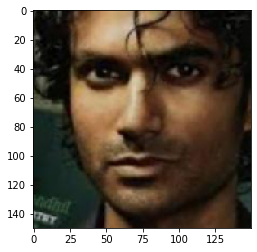

Predicted Age:11-25
Predicted Gender:Female


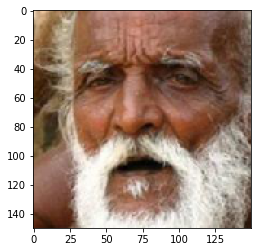

Predicted Age:11-25
Predicted Gender:Female


In [83]:
dir_path = '/content/Gender_And_Age_Images/test'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(150,150))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  gender = gendermodel.predict(images)
  age = agemodel.predict(images)
  #print(gender)
  #print(age)
  if gender.all() == 0:
    if age.all() == 0:
      print('Predicted Age:1-10')
    elif age.all() == 1:
      print('Predicted Age:11-25')
    elif age.all() ==2:
      print('Predicted Age:26-45')
    else:
      print('45above')
    print('Predicted Gender:Female')
  else:
    if age.all() == 0:
      print('Predicted Age:1-10')
    elif age.all() == 1:
      print('Predicted Age:11-25')
    elif age.all() ==2:
      print('Predicted Age:26-45')
    else:
      print('45above')
    print('Predicted Gender:Male')